# Titanic Dataset

## Get the data

In [1]:
import pandas as pd
import tensorflow as tf

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

2022-11-09 20:37:15.073094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 20:37:15.474505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-09 20:37:15.474557: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-09 20:37:15.526410: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 20:37:16.796542: W tensorflow/stream_executor/platform/de

In [69]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [71]:
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [72]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


## Visualisation des donnees

Text(0, 0.5, 'Nombres de personnes ayant ce age')

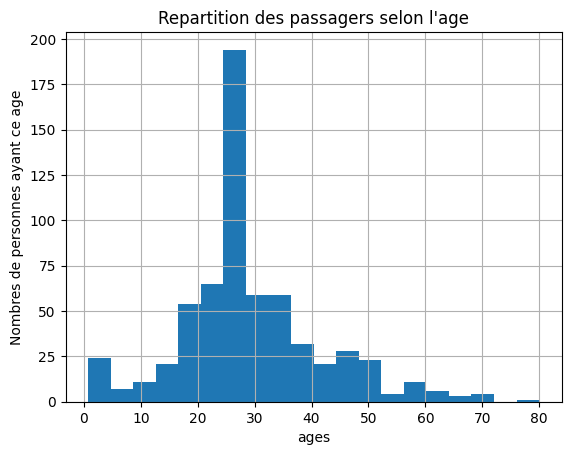

In [44]:
axe = dftrain.age.hist(bins = 20)
axe.set_title("Repartition des passagers selon l'age")
axe.set_xlabel("ages")
axe.set_ylabel("Nombres de personnes ayant ce age")

Text(0, 0.5, 'sexe')

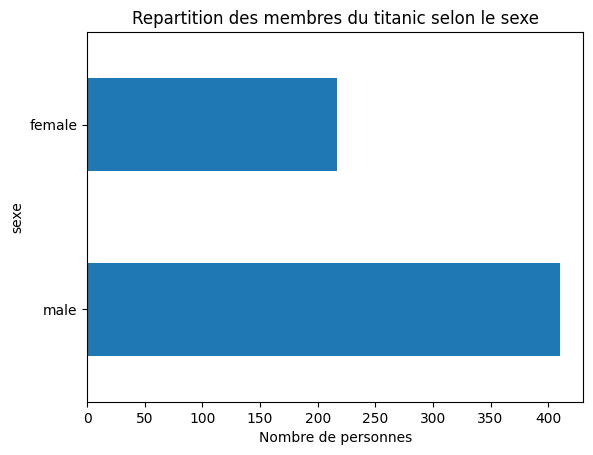

In [14]:
axe2 = dftrain.sex.value_counts().plot(kind='barh')
axe2.set_title("Repartition des membres du titanic selon le sexe")
axe2.set_xlabel("Nombre de personnes")
axe2.set_ylabel("sexe")

Text(0, 0.5, 'Classe des passagers')

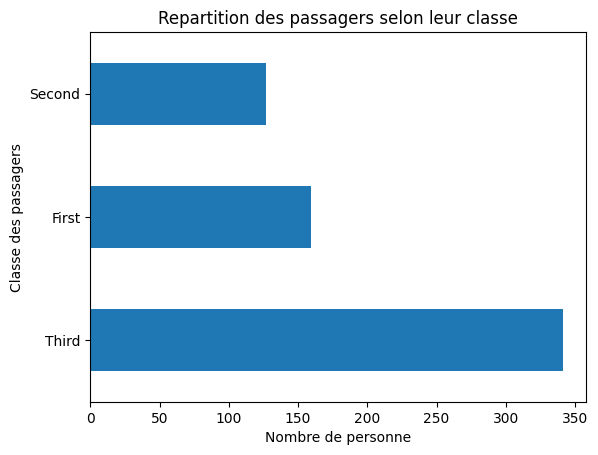

In [17]:
axe3 = dftrain['class'].value_counts().plot(kind='barh')
axe3.set_title("Repartition des passagers selon leur classe")
axe3.set_xlabel("Nombre de personne")
axe3.set_ylabel("Classe des passagers")

Text(0, 0.5, "Ville d'embarquement")

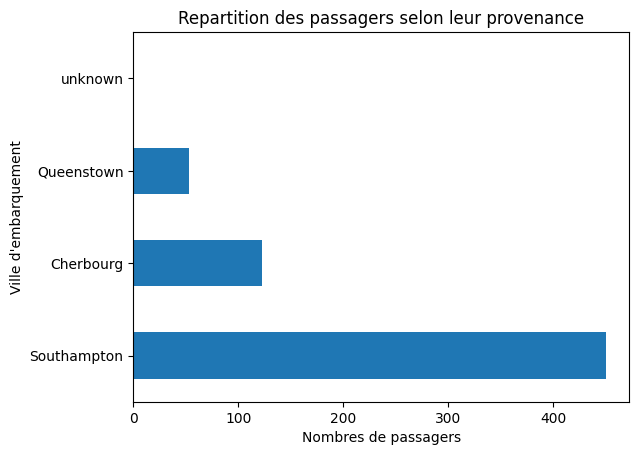

In [28]:
axe4 = dftrain["embark_town"].value_counts().plot(kind = "barh")
axe4.set_title("Repartition des passagers selon leur provenance")
axe4.set_xlabel("Nombres de passagers")
axe4.set_ylabel("Ville d'embarquement")

Text(0.5, 1.0, 'Chance de survie selon le sexe')

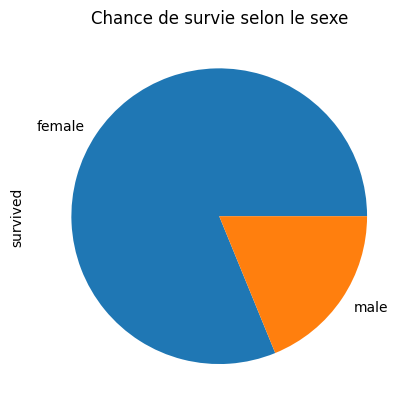

In [37]:
axe5 = pd.concat([dftrain, y_train], axis = 1).groupby("sex").survived.mean().plot(kind = "pie")
axe5.set_title("Chance de survie selon le sexe")

Text(0.5, 1.0, 'Chance de survie selon le sexe')

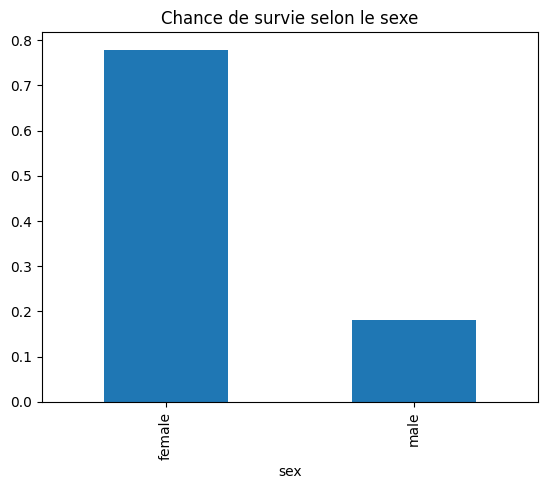

In [39]:
axe6 = pd.concat([dftrain, y_train], axis = 1).groupby("sex").survived.mean().plot(kind = "bar")
axe6.set_title("Chance de survie selon le sexe")

Text(0.5, 1.0, 'Chance de survie selon la classe')

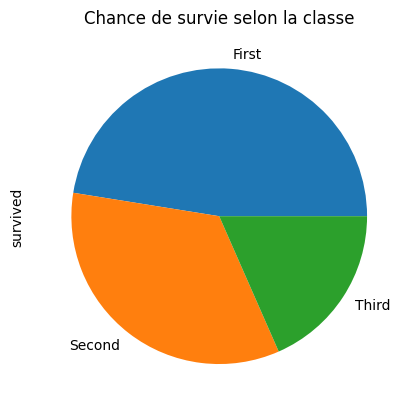

In [41]:
axe5 = pd.concat([dftrain, y_train], axis = 1).groupby("class").survived.mean().plot(kind = "pie")
axe5.set_title("Chance de survie selon la classe")

Text(0.5, 1.0, 'Chance de survie des "femmes non accompagees" vs "les femmes accompagnees" ')

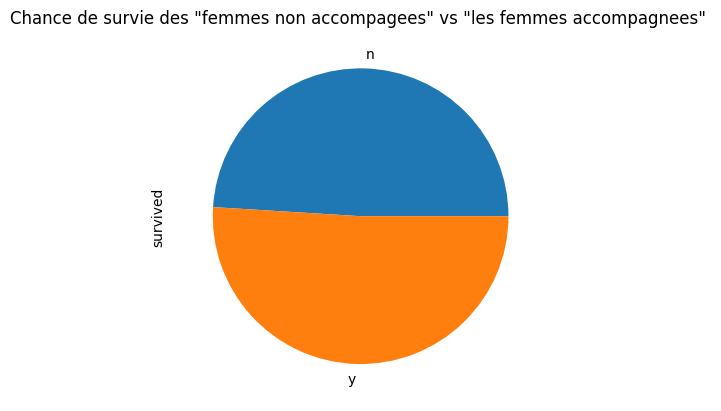

In [55]:
df = pd.concat([dftrain, y_train], axis = 1)#.groupby("alone").survived.mean().plot(kind = "pie")
df = df[df["sex"] =="female"]
axe7 = df.groupby("alone").survived.mean().plot(kind = "pie")
axe7.set_title("""Chance de survie des "femmes non accompagees" vs "les femmes accompagnees" """)

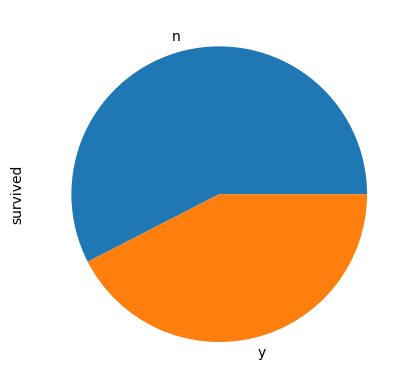

In [56]:
df = pd.concat([dftrain, y_train], axis = 1)#.groupby("alone").survived.mean().plot(kind = "pie")
df = df[df["sex"] =="male"]
df = df.groupby("alone").survived.mean().plot(kind = "pie")

## Preparation des entrainements

### Linear Regression

In [59]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [60]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [61]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [63]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

2022-11-08 07:31:19.096306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-08 07:31:19.100606: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-08 07:31:19.100681: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elvis-ThinkPad-T440p): /proc/driver/nvidia/version does not exist
2022-11-08 07:31:19.136457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'Third' b'First' b'First' b'First' b'Third' b'Third' b'Third'
 b'Third' b'Third']

A batch of Labels: [0 0 0 1 0 1 0 0 0 0]


In [64]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

array([[28.],
       [ 2.],
       [42.],
       [51.],
       [28.],
       [28.],
       [17.],
       [41.],
       [30.],
       [28.]], dtype=float32)

In [66]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [69]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.8299969, 'auc_precision_recall': 0.79440415, 'average_loss': 0.4771717, 'label/mean': 0.375, 'loss': 0.46939617, 'precision': 0.65346533, 'prediction/mean': 0.40759206, 'recall': 0.6666667, 'global_step': 200}


In [75]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)
sex_x_class = tf.feature_column.crossed_column(['sex', 'class'], hash_bucket_size=100)

In [76]:
age_x_gender,sex_x_class

(CrossedColumn(keys=('age', 'sex'), hash_bucket_size=100, hash_key=None),
 CrossedColumn(keys=('sex', 'class'), hash_bucket_size=100, hash_key=None))

In [78]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8433732, 'auc_precision_recall': 0.79550374, 'average_loss': 0.48137304, 'label/mean': 0.375, 'loss': 0.47399738, 'precision': 0.6574074, 'prediction/mean': 0.44082412, 'recall': 0.7171717, 'global_step': 200}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0n2doaxz/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0      0.164130
1      0.552452
2      0.837982
3      0.774777
4      0.345704
         ...   
259    0.826152
260    0.114131
261    0.577657
262    0.344472
263    0.562193
Length: 264, dtype: float32


<AxesSubplot: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

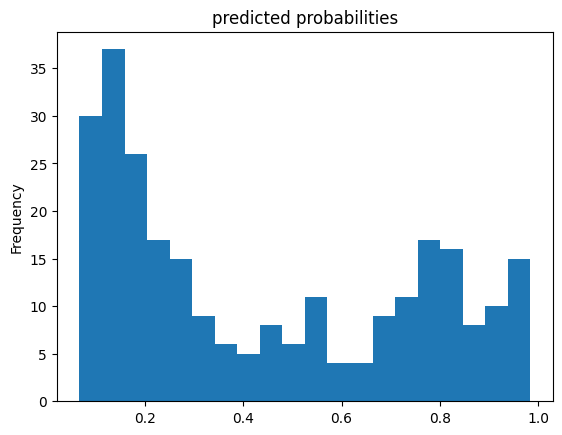

In [81]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
print(probs)


probs.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

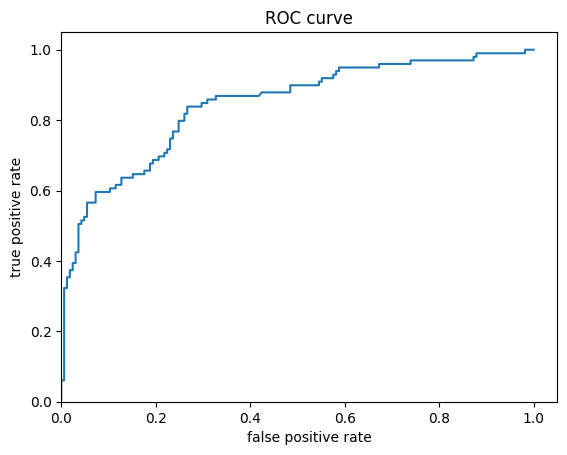

In [82]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

### DNN classifiers


In [73]:
# Remplacer les valeurs non numeriques par des valeurs numeriques
# Par example le sex devient 0 ou 1 au lieu de male/female

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

for c in CATEGORICAL_COLUMNS:
    print(dftrain[c].unique())
    d = dict([(element,indice) for indice,element in enumerate(dftrain[c].unique())])
    
    for u in d.keys():
        dftrain[c] = dftrain[c].replace(u,d[u])

['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4]
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']


In [74]:
y_train = y_train.values.reshape(-1,1)

In [112]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50,activation = "tanh"))
    model.add(tf.keras.layers.Dense(25,activation = "tanh"))
    model.add(tf.keras.layers.Dense(12,activation = "tanh"))
    model.add(tf.keras.layers.Dense(6,activation = "tanh"))
    model.add(tf.keras.layers.Dense(3,activation = "tanh"))

    model.add(tf.keras.layers.Dense(6,activation = "tanh"))
    model.add(tf.keras.layers.Dense(12,activation = "tanh"))
    model.add(tf.keras.layers.Dense(25,activation = "tanh"))
    model.add(tf.keras.layers.Dense(50,activation = "tanh"))
    model.add(tf.keras.layers.Dense(25,activation = "tanh"))
    model.add(tf.keras.layers.Dense(12,activation = "tanh"))
    model.add(tf.keras.layers.Dense(6,activation = "tanh"))
    model.add(tf.keras.layers.Dense(3,activation = "tanh"))
    model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

    return model 

model = create_model()


In [113]:
from gc import callbacks
import os 


checkpoint_path = "training_dense_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer,loss=loss,metrics = ["accuracy"])

history = model.fit(dftrain.values,y_train,epochs=100,callbacks =[cp_callback])
print(max(history.history.get('accuracy')))

Epoch 1/100
17/20 [========================>.....] - ETA: 0s - loss: 0.6423 - accuracy: 0.6379 
Epoch 1: saving model to training_dense_1/cp.ckpt
20/20 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.6411
Epoch 2/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6524 - accuracy: 0.6562
Epoch 2: saving model to training_dense_1/cp.ckpt
20/20 [==============================] - 0s 5ms/step - loss: 0.6163 - accuracy: 0.6794
Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7239 - accuracy: 0.5312
Epoch 3: saving model to training_dense_1/cp.ckpt
20/20 [==============================] - 0s 5ms/step - loss: 0.6156 - accuracy: 0.6667
Epoch 4/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6539 - accuracy: 0.5938
Epoch 4: saving model to training_dense_1/cp.ckpt
20/20 [==============================] - 0s 5ms/step - loss: 0.6005 - accuracy: 0.6858
Epoch 5/100
 1/20 [>.............................] - ETA: 0s - loss: 0.

In [92]:
# Remplacer les valeurs non numeriques par des valeurs numeriques
# Par example le sex devient 0 ou 1 au lieu de male/female

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

for c in CATEGORICAL_COLUMNS:
    d = dict([(element,indice) for indice,element in enumerate(dfeval[c].unique())])
    
    for u in d.keys():
        dfeval[c] = dfeval[c].replace(u,d[u])

dfeval

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,35.0,0,0,8.0500,0,0,0,0
1,0,54.0,0,0,51.8625,1,1,0,0
2,1,58.0,0,0,26.5500,1,2,0,0
3,1,55.0,0,0,16.0000,2,0,0,0
4,0,34.0,0,0,13.0000,2,3,0,0
...,...,...,...,...,...,...,...,...,...
259,1,25.0,0,1,26.0000,2,0,0,1
260,0,33.0,0,0,7.8958,0,0,0,0
261,1,39.0,0,6,29.1250,0,0,1,1
262,0,27.0,0,0,13.0000,2,0,0,0


In [93]:
y_eval = y_eval.values.reshape(-1,1)

In [117]:
inp = np.asarray(dfeval.values).astype("float32")

model = create_model()
model.load_weights(checkpoint_path)
prediction = model.predict(inp)

9/9 [==============================] - 0s 2ms/step


In [118]:
from sklearn.metrics import precision_recall_fscore_support,precision_score,jaccard_score

y_eval = y_eval.reshape(264,)
prediction = prediction.reshape(264,) 
prediction[prediction > 0.5] = 1
prediction[prediction <= 0.5] = 0

In [119]:
jaccard_score(y_eval,prediction)

0.5528455284552846